In [1]:
import lambdahat_helpers as lah
import os
import time
import torch
import numpy as np
import pickle
import argparse
import matplotlib.pyplot as plt

[LOADING HYPERPARAMETERS...]
algo : ppo
n_envs : 64
n_steps : 256
epoch : 3
mini_batch_per_epoch : 8
mini_batch_size : 2048
gamma : 0.999
lmbda : 0.95
learning_rate : 0.0005
grad_clip_norm : 0.5
eps_clip : 0.2
value_coef : 0.5
entropy_coef : 0.01
normalize_adv : True
normalize_rew : True
use_gae : True
architecture : impala
recurrent : False
INITIALIZAING ENVIRONMENTS...
INITIALIZAING LOGGER...


In [2]:
directory = f"variance_data"
result_files = os.listdir(directory)[-4:]
results = []
for result_file in result_files:
    with open(os.path.join(directory, f"{result_file}/results.pkl"), "rb") as f:
        results.append(pickle.load(f))

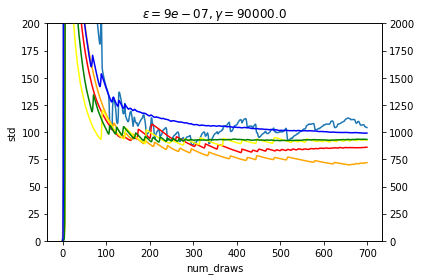

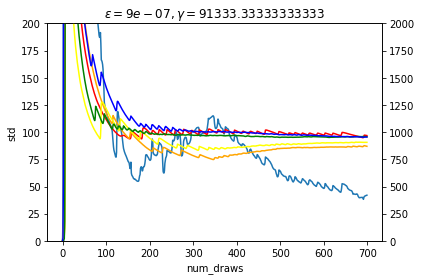

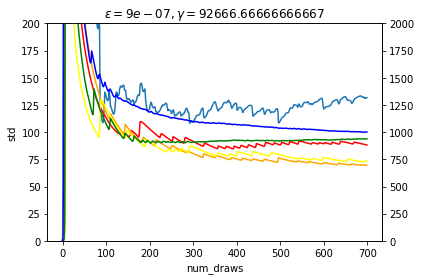

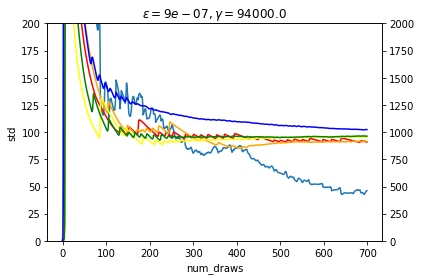

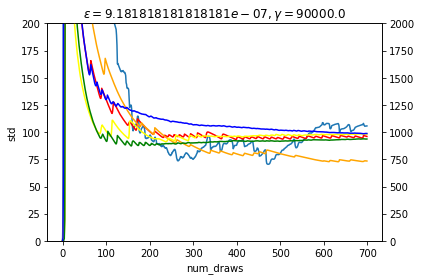

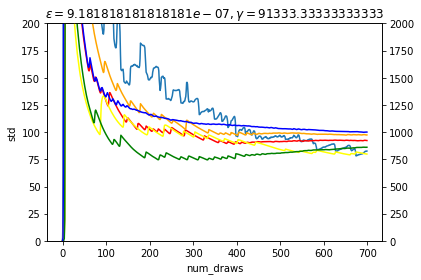

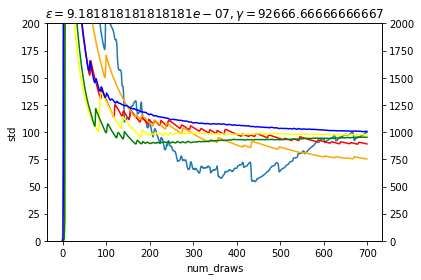

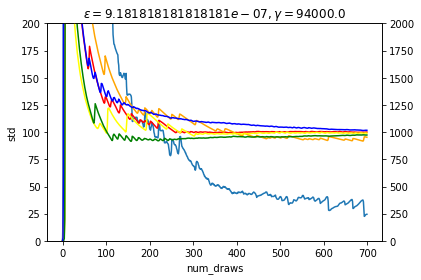

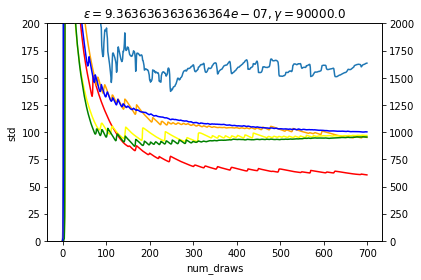

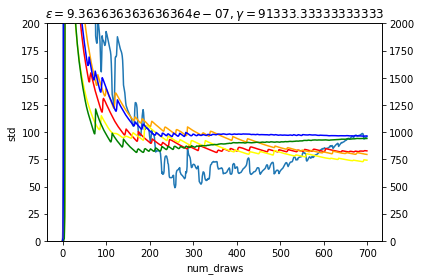

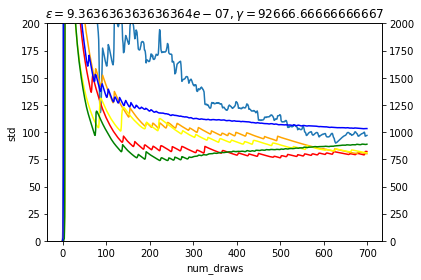

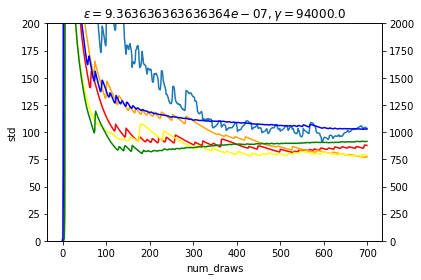

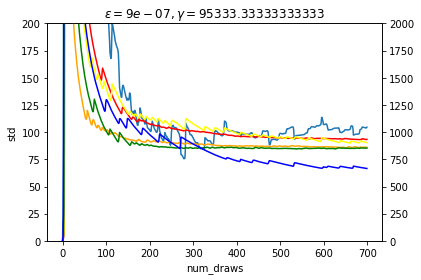

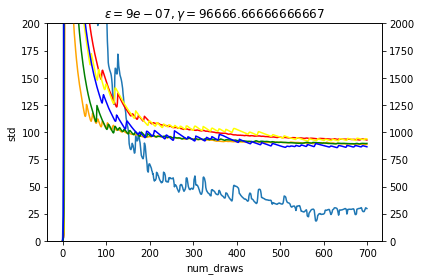

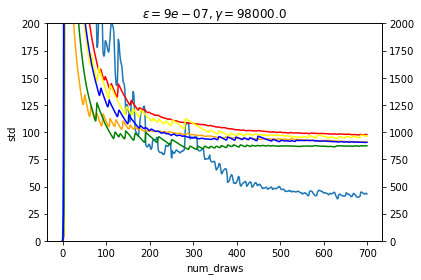

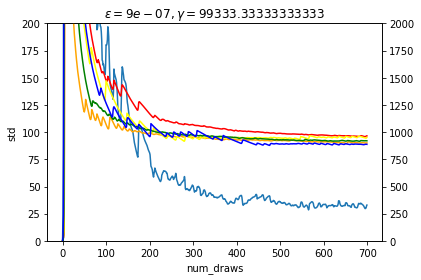

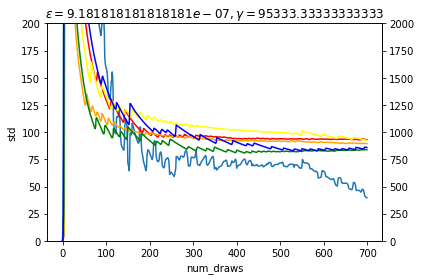

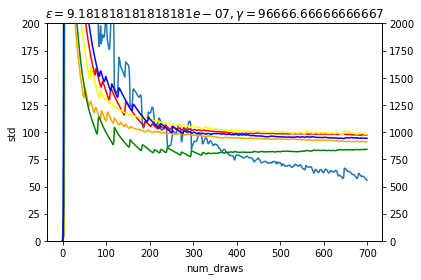

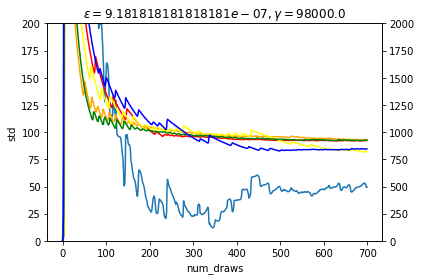

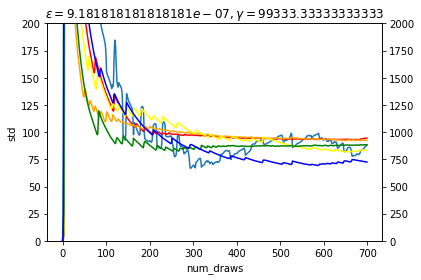

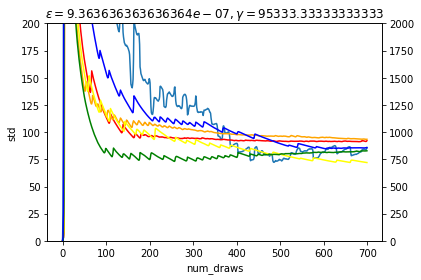

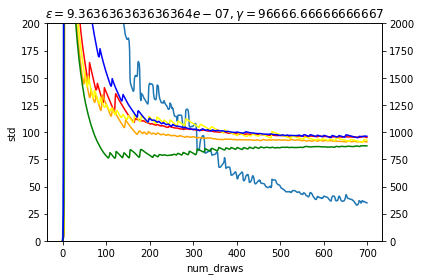

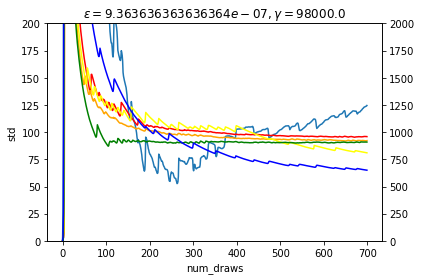

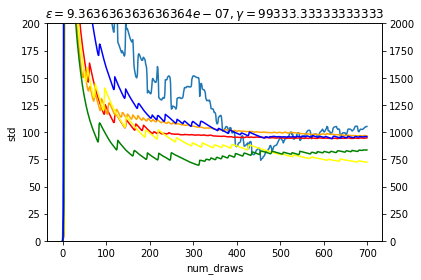

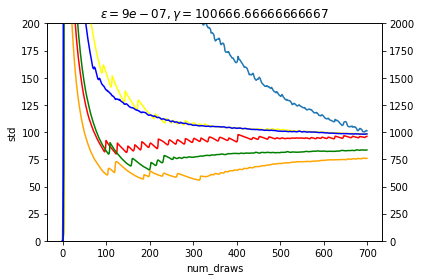

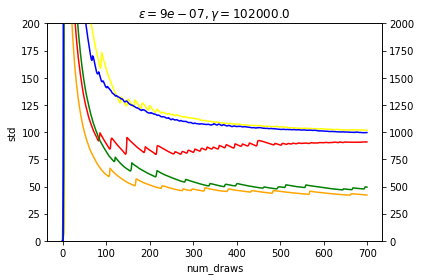

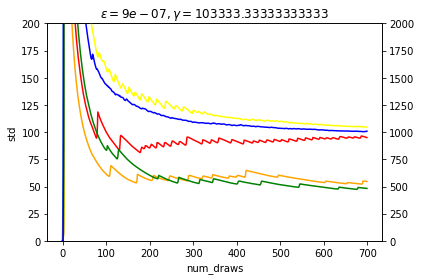

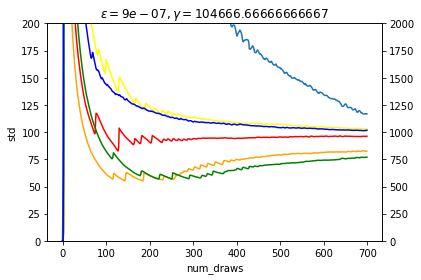

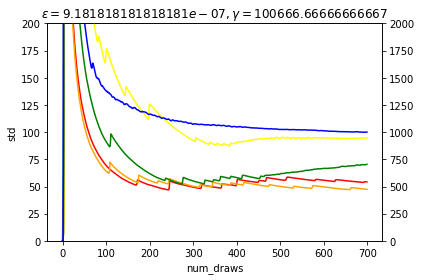

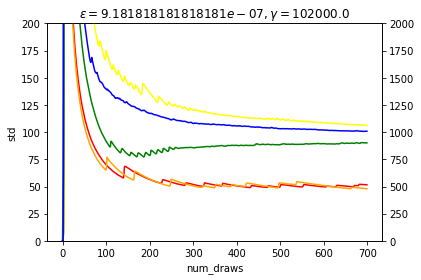

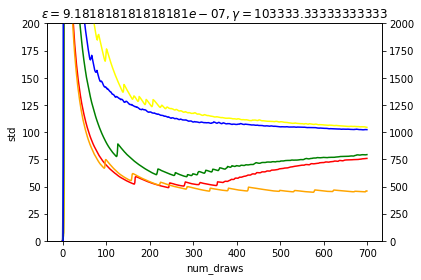

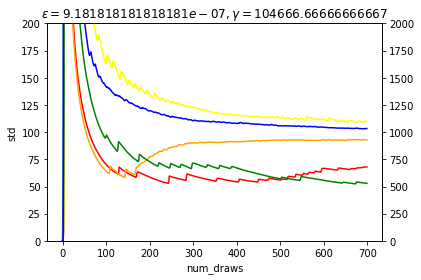

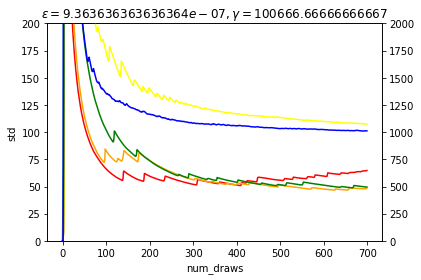

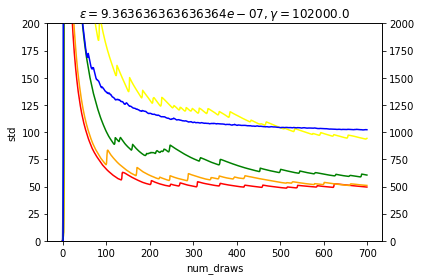

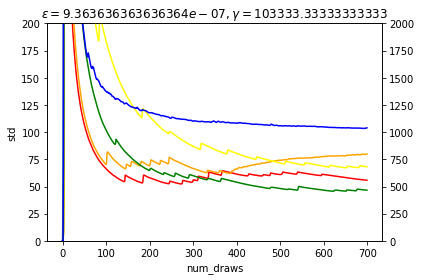

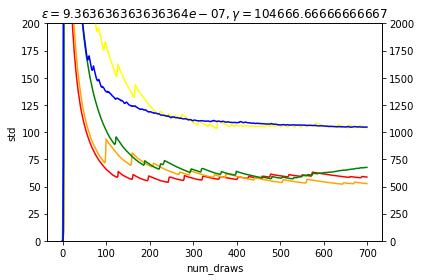

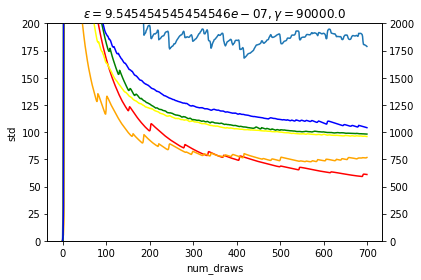

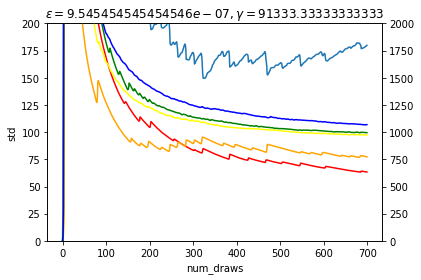

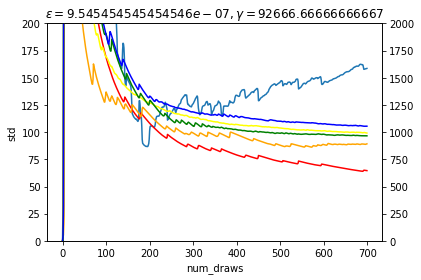

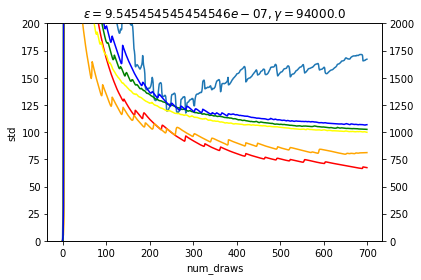

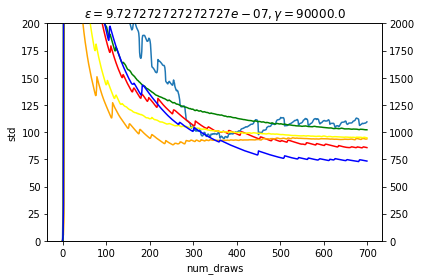

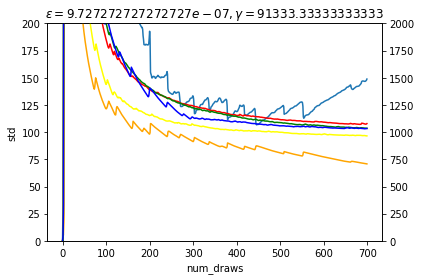

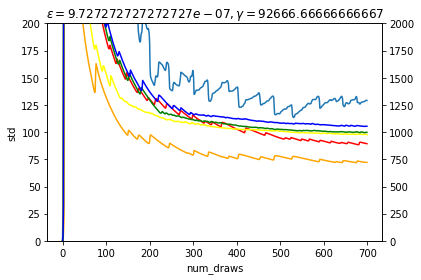

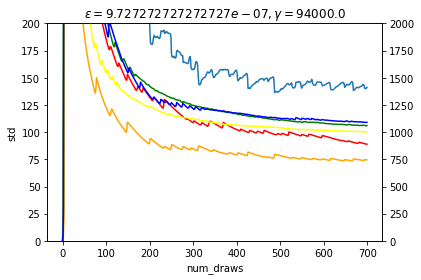

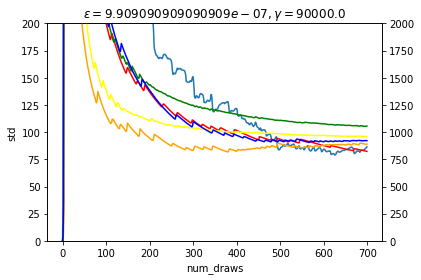

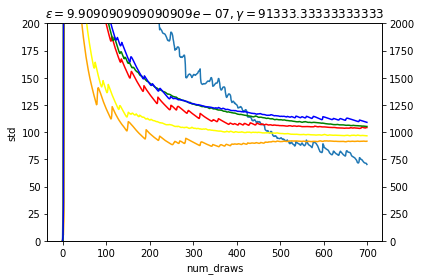

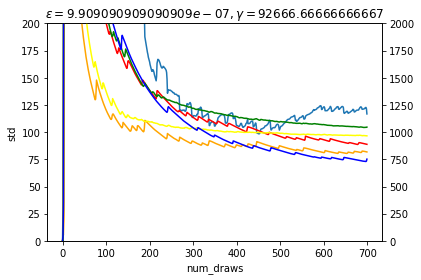

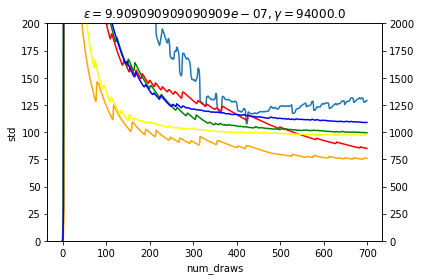

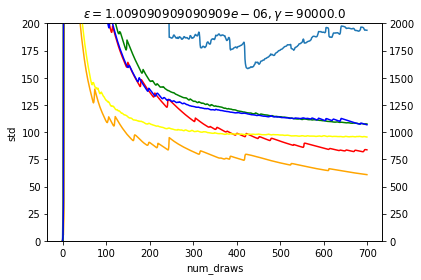

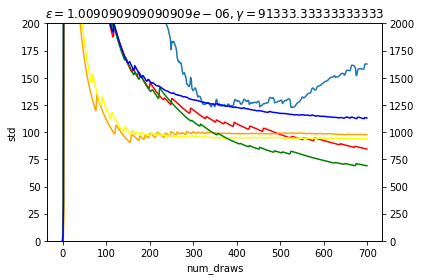

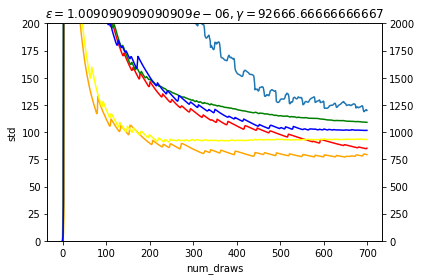

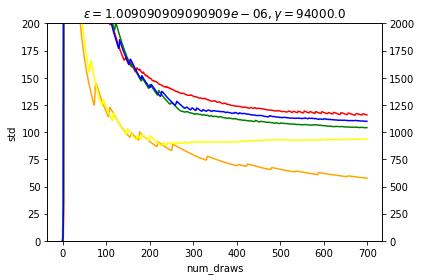

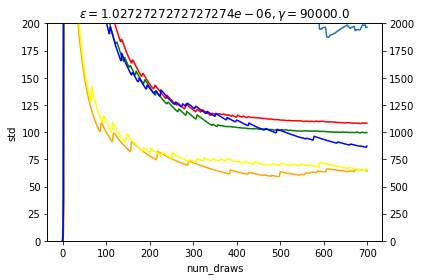

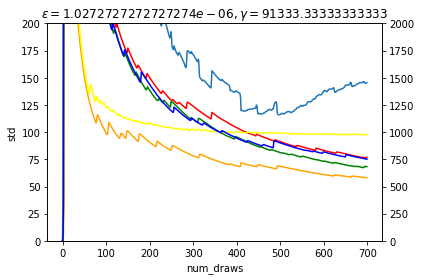

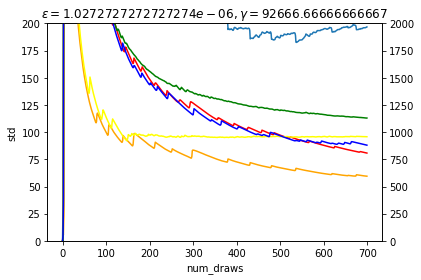

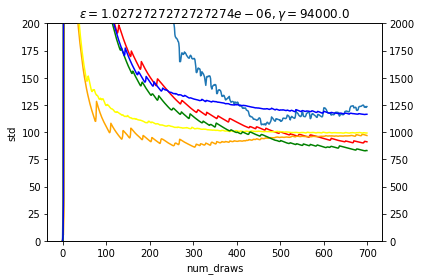

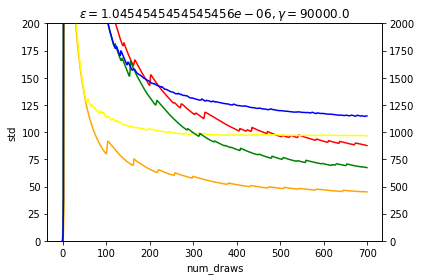

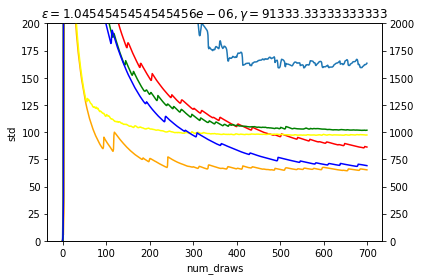

In [3]:
smallest_std = +np.inf
best_result = None
best_key = None
for result in results:
    for key, value in result.items():
        # print(value["llc/trace"].shape)
        plt.plot(value["llc/stds"])
        plt.ylim(0, 200)
        plt.title(f"$\epsilon = {key[0]}, \gamma = {key[1]}$")
        plt.xlabel("num_draws")
        plt.ylabel("std")
        ax2 = plt.twinx()
        ax2.plot(value["llc/trace"][0], color="red")
        ax2.plot(value["llc/trace"][1], color="orange")
        ax2.plot(value["llc/trace"][2], color="yellow")
        ax2.plot(value["llc/trace"][3], color="green")
        ax2.plot(value["llc/trace"][4], color="blue")
        ax2.set_ylabel("llc traces")
        ax2.set_ylim(0, 2000)
        plt.show()

        if value["llc/stds"][-1] < smallest_std:
            smallest_std = value["llc/stds"][-1]
            best_result = value
            best_key = key

In [4]:
print(f"Best key: {best_key}, smallest std: {smallest_std}")

Best key: (9.181818181818181e-07, 94000.0), smallest std: 24.478761672973633


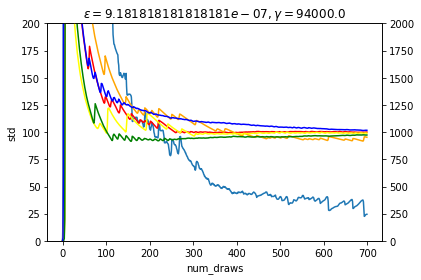

In [5]:
for result in results:
    for key, value in result.items():
        if key == best_key:
            plt.plot(value["llc/stds"])
            plt.ylim(0, 200)
            plt.title(f"$\epsilon = {key[0]}, \gamma = {key[1]}$")
            plt.xlabel("num_draws")
            plt.ylabel("std")
            ax2 = plt.twinx()
            ax2.plot(value["llc/trace"][0], color="red")
            ax2.plot(value["llc/trace"][1], color="orange")
            ax2.plot(value["llc/trace"][2], color="yellow")
            ax2.plot(value["llc/trace"][3], color="green")
            ax2.plot(value["llc/trace"][4], color="blue")
            ax2.set_ylabel("llc traces")
            ax2.set_ylim(0, 2000)
            plt.show()


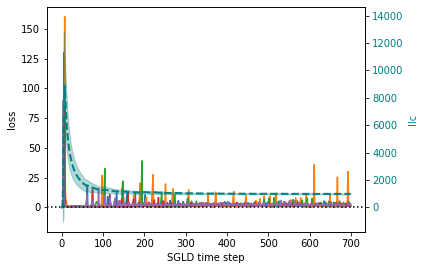

In [6]:
lah.plot_single_graph(best_result)